In [50]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

# Lab 8: Preparing for the Mini Project

So far this semester, we have given you the majority of the code needed to analyze networks. However, you have learned all the basics necessary to analyze data on your own! For your upcoming mini project, you will be:
1. Creating a new python notebook
2. Reading in epistolary data
3. Creating an undirected network from the data
4. Calculating the average in-degree and out-degree of the network
5. Making a scatterplot of in-degrees and out-degrees

As well as a few other analyses.

This lab is designed to make sure you have all the tools you need to complete the mini project. We will be working through the same steps as the mini-project, but with a different epistolary dataset. **You do not need to turn this lab in.**

## Step 1: Creating a new python notebook

There are a number of different ways to go about this. One possibility is Cal's Datahub:

_https://datahub.berkeley.edu/hub_

You can log in with your Calnet ID, then go to file > new > new notebook. Make sure to save your work in a place you can access it again!

You could also download Anaconda-Navigator, and then open a Jupyter Notebook. Again, you would create a new file by going to file > new > new notebook.

## Step 2: Reading in the data

Reading in the data is often the most difficult and time consuming part of the research process, as silly as that may sound. Here, we will read in the Stanford email data. It is always useful to check out the data documentation.

Here is the documentation for the Stanford Data. This is also **where you will download the data:**

https://snap.stanford.edu/data/email-Eu-core-temporal.html

Here is where you will download the Tudor data, and also read the necessary documentation:


https://github.com/tudor-networks-of-power/code/tree/main/TNP_DATA

Although the Stanford dataset is obviously much more recent than the Tudor data you will be using for the Mini Project, the basic premise is similar. If one person sent another an email or letter, there is an edge between those two nodes. It is possible to create a directed, weighted network from the data if we keep track of who sent the correspondence and how many were sent. It is also possible to flatten the data into a simple, undirected, unweighted graph.

First, **identify what data you need.** In the Stanford case, it would be useful to get all emails between members of the institution. In the Tudor dataset, you will probably want to focus on the letter edgelist, rather than anything specific to one of the chapters.

Next, **download that data.** Click the link with the relevant files, and then store those files someplace you can find on your own computer (or upload to the datahub server).

There are many different ways to "read in" the data, or to tell your Python program where to access the data on your own computer. Here, we assign a filepath first.

In [51]:
data_dir = "./email-Eu-core-temporal.txt.gz"

One common method to read in the data is the pandas .read function. It will be important to read the data documentation and know what format the data is in (e.g. tab delimited, csv, etc.)

For the Stanford data, we've specificed that the separation between data cells is a blank space, or " ". For the tudor data, you may want to google "How to convert tab-separated file into a dataframe using Python."

In [52]:
raw_data = pd.read_csv(data_dir, sep=" ", header=None)
raw_data

,0,1,2
0,582,364,0
1,168,472,2797
2,168,912,3304
3,2,790,4523
4,2,322,7926
...,...,...,...
332329,324,367,45401817
332330,790,126,45402441
332331,790,126,45403709
332332,782,126,45404903


Success! We have the data loaded. Still, it is a little confusing to look at right now. If we refer to the documentation, we learn that the first column is an index variable, the second column is who the email is from, third column is who the email is to, and fourth column is the time that email was sent.

In [53]:
# Add column names so we know how to interpret the data
raw_data = raw_data.rename(index=str, columns={0 : "from", 1 : "to", 2 : "time"})
raw_data.head()

,from,to,time
0,582,364,0
1,168,472,2797
2,168,912,3304
3,2,790,4523
4,2,322,7926


## Step 3: Creating an undirected network from the data

We need to transform the data into an undirected network. As it currently stands, each row in the dataset is an observation. "At time X, there was an email from node Z to node Y." We want to transform this, so that there is a single row for every sender/recipient pairing. In other words, if Z emailed Y many different times, we want to condense all that information to a single row by adding a "weight" variable.

In [54]:
# Create an aggregated edge list, so we only have one row for each sender/recipient pairing
# And calculate a "weight" variable
raw_data_agg = raw_data.groupby(['from', 'to']).size().reset_index(name='weight')
raw_data_agg

,from,to,weight
0,0,5,2
1,0,6,55
2,0,29,1
3,0,78,37
4,0,99,11
...,...,...,...
24924,1004,922,1
24925,1004,928,2
24926,1004,969,2
24927,1004,977,100


In [55]:
# Sort by the weight of the edges
raw_data_agg.sort_values(by='weight', ascending=False)

,from,to,weight
19599,774,947,2816
23468,947,774,2176
10813,418,996,1248
4815,168,912,1212
22476,912,168,1197
...,...,...,...
16418,658,847,1
16419,658,870,1
16421,658,902,1
16422,658,953,1


## Step 4: Calculating the average in-degree and out-degree of the network

We currently have a dataset with one row for each sender/recipient pairing. There are many different ways to calculate the average in-degree and out-degree of a network, but one easy way is to reformulate the data. We can collapse the data even further, so there is  a single row for each node. Then we can calculate the number of emails sent to and from that node.

In [56]:
email_net = nx.from_pandas_edgelist(df = raw_data_agg, source='from', target='to', edge_attr=True)

In [57]:
email_net_directed = nx.from_pandas_edgelist(df = raw_data_agg, 
                                             source='from', 
                                             target='to',
                                             create_using = nx.DiGraph(),
                                             edge_attr=True)

In [58]:
# Create a dataset with only one row for each node (rather than one row for each node/node pair)
# Calculate the number of emails sent to that node by any other node
# And the number of emails sent from that node to any other node

email_degree_df = pd.DataFrame({'id' : email_net_directed.nodes(),
             'in_degree' : [y for (x,y) in email_net_directed.in_degree()],
             'out_degree' : [y for (x,y) in email_net_directed.out_degree()]
             })

email_degree_df

,id,in_degree,out_degree
0,0,43,54
1,5,49,35
2,6,39,0
3,29,43,65
4,78,39,25
...,...,...,...
981,20,1,0
982,911,1,2
983,877,1,0
984,960,0,1


In [59]:
# Calculate the average in-degree
av_in_degree = np.average(email_degree_df['in_degree'])
av_in_degree

25.28296146044625

In [60]:
# Calculate the average out-degree
av_out_degree = np.average(email_degree_df['out_degree'])
av_out_degree

25.28296146044625

Success!

## Step 5: Making a scatterplot of in-degrees and out-degrees

A scatterplot of in-degrees and out-degrees will allow us to see whether epistolary edges are somewhat reciprocal. Do some people send far more emails than they receive? 

In [61]:
# Uncomment and run the following cell if you get the warning "divide by zero encountered in log"
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

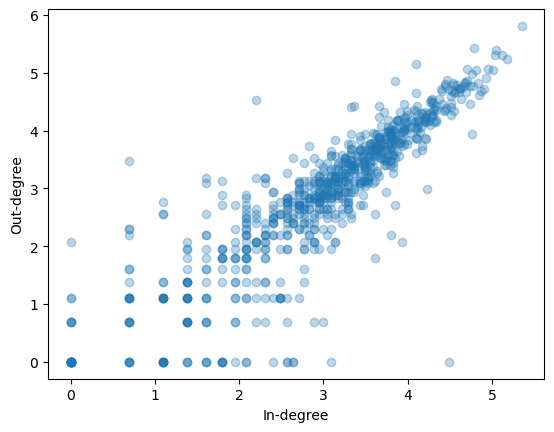

In [62]:
plt.scatter(np.log(email_degree_df['in_degree']),
            np.log(email_degree_df['out_degree']),
            alpha = 0.3)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel("In-degree")
plt.ylabel("Out-degree")
plt.show()

Congratulations! You've finished Lab 8 and hopefully have all the tools you need to complete the mini-project. You will be running the same analyses, just on a different set of data.

Please do reach out to us if you encounter difficulties. This would be a good time to attend section or come to office hours!